# Run the Imports and Functions

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from cv2 import fastNlMeansDenoising
import pywt
from skimage.io import imread, imsave
from skimage.util import img_as_float64
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

from src.noiseDist import addNoise
from src.thresholdingMethod import applyShrink
from src.utilities import get_sigma_est, mse, gaussianSmoothing, medianSmoothing, calculate_ssim

In [43]:
def denoising(image, wavelet = 'db4', level = 4, mode = 'sure'):
    N = image.size
    coeffs = pywt.wavedec2(image, wavelet = wavelet, level = level)
    sigma_est = get_sigma_est(coeffs)
    thresholded_details = applyShrink(coeffs, sigma_est, N,  mode = mode)
    denoised_img = pywt.waverec2(thresholded_details, wavelet = wavelet)
    return denoised_img

# Input Image and Parameters

In [13]:
image_label = {0: 'cameraman',      1: 'house', 
               2: 'jetplane',       3: 'lake', 
               4: 'lena',           5: 'livingroom', 
               6: 'mandril',        7: 'peppers', 
               8: 'pirate',         9: 'walkbridge', 
               10: 'woman_blonde',  11: 'woman_darkhair'}

# Write the Index for the image
image_idx = 0

In [14]:
img = imread('dataset/' + image_label[image_idx] + '.tif')
img_float = img_as_float64(img)
img.shape

(512, 512)

In [30]:
# Parameters
# mode = gaussian      sigma = Low: 15             Moderate:  25             High: 50
# mode = s&p          amount = Low: 0.05           Moderate: 0.1             High: 0.2
# mode = uniform   low, high = Low: (-0.1, 0.1)    Moderate: (-0.2, 0.2)     High: (-0.5, 0.5)

gaussian_sigma = 25
sp_noise_amt = 0.05
uni_low, uni_high = -0.1, 0.1
noise_mode = 'gaussian'

wavelet_level = 1
wavelet_type = 'haar'
mode = ['visu', 'sure', 'bayes']

# Process

In [31]:
noisy_img = addNoise(img_float, mode = noise_mode, mean = 0, sigma = gaussian_sigma, amount = sp_noise_amt, low = uni_low, high = uni_high)

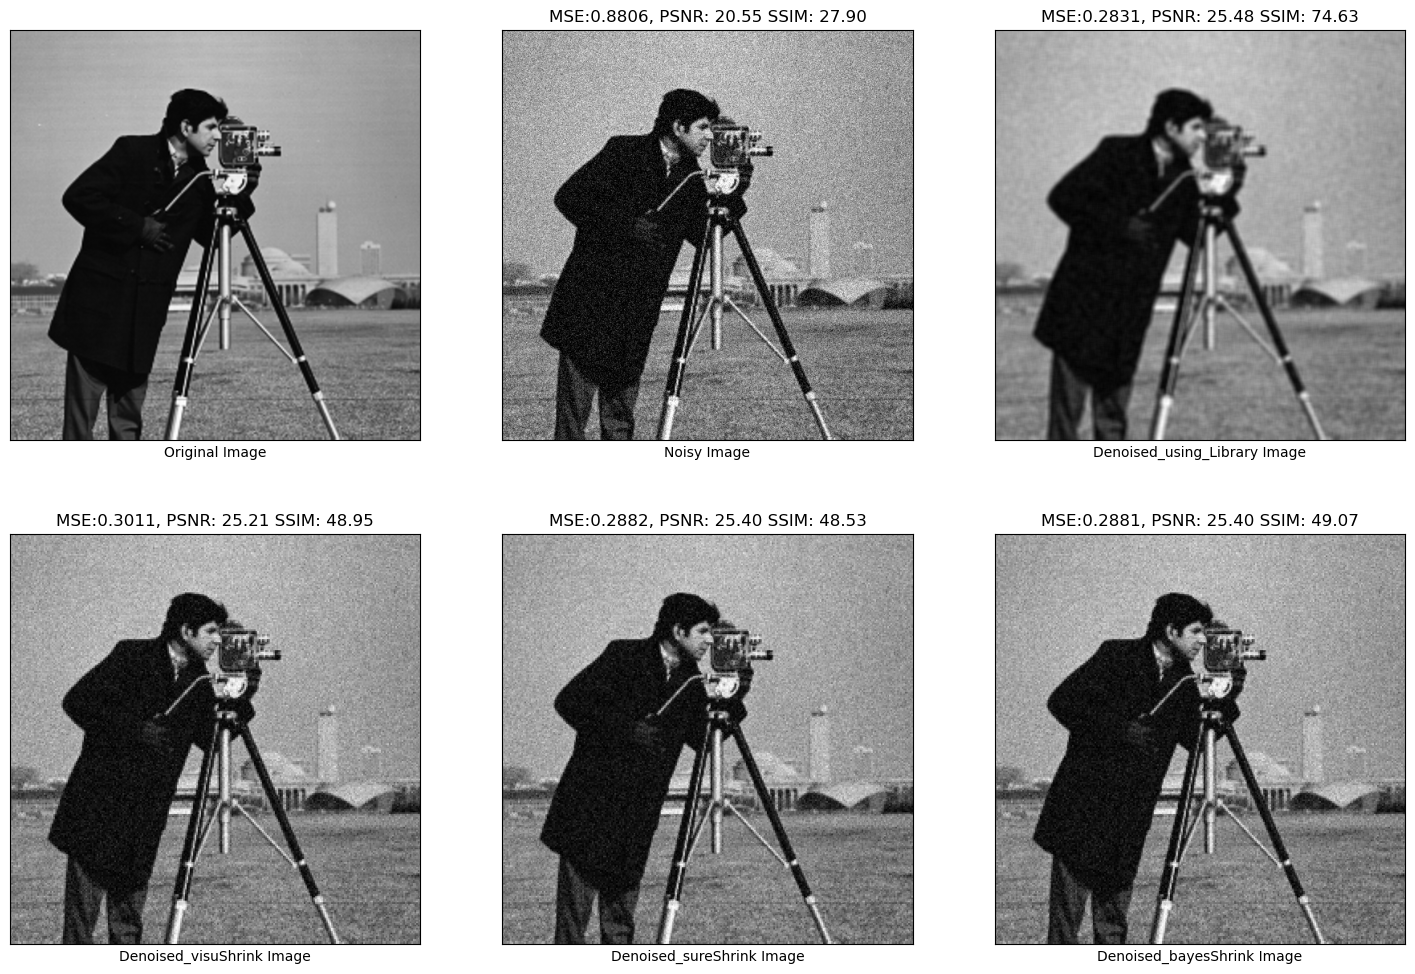

In [44]:

denoised_img_lib = gaussianSmoothing(noisy_img, 7, 25)
# denoised_img_lib = img_as_float64(fastNlMeansDenoising((noisy_img * 255).astype(np.uint8), None, 20))

fig,axes = plt.subplots(nrows=2, ncols=3, figsize=(18,12))
axes[0, 0].imshow(img_float, cmap='gray')
axes[0, 0].set_xticks([])
axes[0, 0].set_yticks([])
axes[0, 0].set_xlabel("Original Image")

MSE = mse(img_float, noisy_img) * 100
SSIM = calculate_ssim(img_float, noisy_img) * 100
PSNR = psnr(img_float, noisy_img)
axes[0, 1].imshow(noisy_img, cmap='gray')
axes[0, 1].set_xticks([])
axes[0, 1].set_yticks([])
axes[0, 1].set_title(f"""MSE:{MSE:.4f}, PSNR: {PSNR:.2f} SSIM: {SSIM:.2f}""")
axes[0, 1].set_xlabel("Noisy Image")


MSE = mse(img_float, denoised_img_lib) * 100
SSIM = calculate_ssim(img_float, denoised_img_lib) * 100
PSNR = psnr(img_float, denoised_img_lib)
axes[0, 2].imshow(denoised_img_lib, cmap='gray')
axes[0, 2].set_xticks([])
axes[0, 2].set_yticks([])
axes[0, 2].set_title(f"""MSE:{MSE:.4f}, PSNR: {PSNR:.2f} SSIM: {SSIM:.2f}""")
axes[0, 2].set_xlabel("Denoised_using_Library Image")

for i in range(len(mode)):
    denoised_img = denoising(noisy_img, wavelet_type, wavelet_level, mode[i])

    MSE = mse(img_float, denoised_img) * 100
    SSIM = calculate_ssim(img_float, denoised_img) * 100
    PSNR = psnr(img_float, denoised_img)
    axes[1, i].imshow(denoised_img, cmap='gray')
    axes[1, i].set_xticks([])
    axes[1, i].set_yticks([])
    axes[1, i].set_title(f"""MSE:{MSE:.4f}, PSNR: {PSNR:.2f} SSIM: {SSIM:.2f}""")
    axes[1, i].set_xlabel(f"""Denoised_{mode[i]}Shrink Image""")


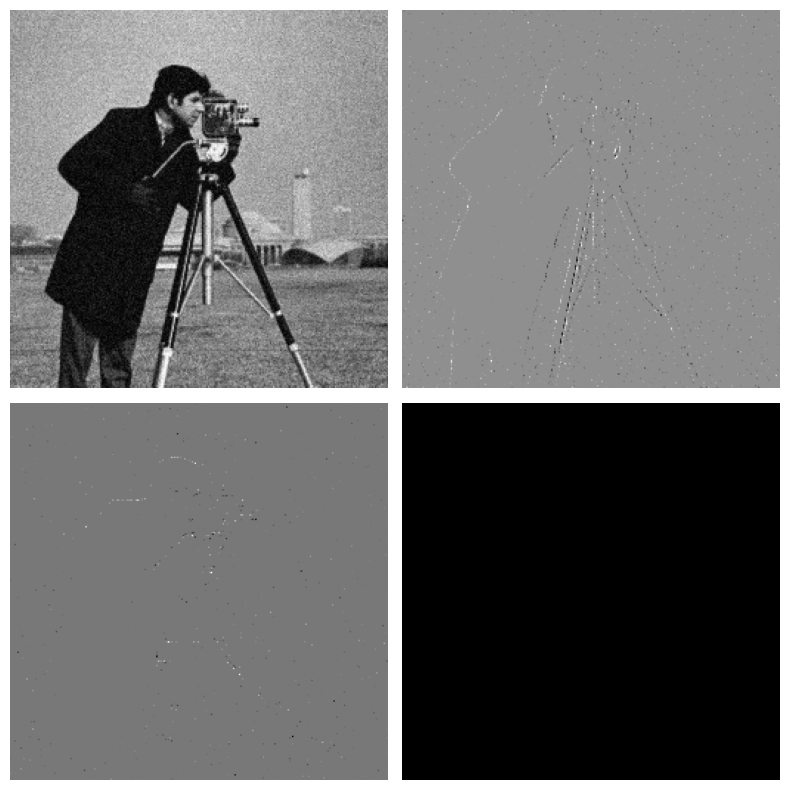

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

axs[0, 0].imshow(t[0], cmap='gray')
axs[0, 0].axis('off')

axs[0, 1].imshow(t[1][1], cmap='gray')
axs[0, 1].axis('off')

axs[1, 0].imshow(t[1][0], cmap='gray')
axs[1, 0].axis('off')

axs[1, 1].imshow(t[1][2], cmap='gray')
axs[1, 1].axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.show()

In [16]:
# noise_mode_list = ['gaussian', 's&p', 'uniform']     #For main Stats
# wavelet_type_list = ['db4', 'haar']           # For main Stats
# mode_list = ['visu', 'sure', 'bayes']
# level = 4
# gaussian_sigma = 25
# sp_noise_amt = 0.05
# uni_low, uni_high = -0.1, 0.1
# noise_mode = 'gaussian'

# stats = {}
# for noise_mode in noise_mode_list:
#     stats[noise_mode] = {}
#     for image_idx, image_name in image_label.items():
        
#         img_float = img_as_float64(imread('dataset/' + image_name + '.tif'))
#         noisy_img = addNoise(img_float, mode = noise_mode, mean = 0, sigma = gaussian_sigma, amount = sp_noise_amt, low = uni_low, high = uni_high)
#         stats[noise_mode][image_name] = {'noisy_img': {'SSIM': calculate_ssim(img_float, noisy_img) * 100, 'PSNR': psnr(img_float, noisy_img), "MSE": mse(img_float, noisy_img) * 100}}
        
#         denoised_img_lib = gaussianSmoothing(noisy_img, 5, 25)
#         stats[noise_mode][image_name]['denoised_lib'] = {'SSIM': calculate_ssim(img_float, denoised_img_lib) * 100, 'PSNR': psnr(img_float, denoised_img_lib), "MSE": mse(img_float, denoised_img_lib) * 100}


#         for wavelet_type in wavelet_type_list:
#             stats[noise_mode][image_name][wavelet_type] = {}
#             for mode in mode_list:
#                 denoised_img = denoising(noisy_img, wavelet = wavelet_type, level = level, mode = mode)
#                 MSE = mse(img_float, denoised_img) * 100
#                 SSIM = calculate_ssim(img_float, denoised_img) * 100
#                 PSNR = psnr(img_float, denoised_img)
#                 stats[noise_mode][image_name][wavelet_type][mode] = {'SSIM': SSIM, 'PSNR': PSNR, "MSE": MSE}


In [ ]:
# # Plotting Wavelet Coefficients
# fig,axes = plt.subplots(nrows=level, ncols=3, figsize=(15,20))
# for i in range(1, level + 1):
#     axes[0].imshow(coeffs[i][0], cmap='gray')
#     axes[0].axis('off')
#     axes[0].set_title(f"""LH Coeff: {i}""")

#     axes[1].imshow(coeffs[i][1], cmap='gray')
#     axes[1].axis('off')
#     axes[1].set_title(f"""HL Coeff: {i}""")

#     axes[2].imshow(coeffs[i][2], cmap='gray')
#     axes[2].axis('off')
#     axes[2].set_title(f"""HH Coeff: {i}""")


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

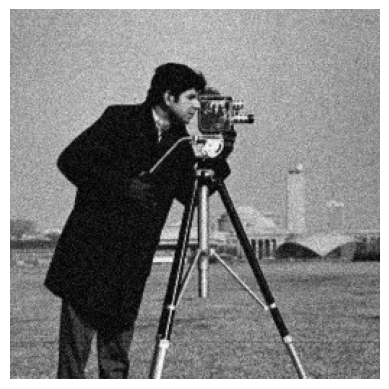

In [ ]:
plt.imshow(denoised_img, cmap='gray')
plt.axis("off")

In [4]:
import pickle

with open("Result.pkl", "rb") as file:
    result = pickle.load(file)

In [5]:
result

{'gaussian': {'cameraman': {'noisy_img': {'SSIM': 27.985296079791816,
    'PSNR': 20.56997034474653,
    'MSE': 0.8770068096540868},
   'denoised_lib': {'SSIM': 75.77784381159941,
    'PSNR': 27.53843304764065,
    'MSE': 0.1762611889319132},
   'db4': {'visu': {'SSIM': 71.88407910235375,
     'PSNR': 24.906036140282012,
     'MSE': 0.3231442153574859},
    'sure': {'SSIM': 73.39548781567431,
     'PSNR': 29.16920839921039,
     'MSE': 0.12108188127947807},
    'bayes': {'SSIM': 72.99539140900728,
     'PSNR': 29.28202845409629,
     'MSE': 0.11797694734148366}},
   'haar': {'visu': {'SSIM': 70.95677861912199,
     'PSNR': 23.967090077703958,
     'MSE': 0.4011354021097945},
    'sure': {'SSIM': 71.2564466655947,
     'PSNR': 27.96837252748519,
     'MSE': 0.15964772980915032},
    'bayes': {'SSIM': 68.62349829662809,
     'PSNR': 27.752353684465668,
     'MSE': 0.16778944269209828}}},
  'house': {'noisy_img': {'SSIM': 22.645861544582267,
    'PSNR': 20.262822717988573,
    'MSE': 0.94